# Group 10 project: Stroke Prediction

### Import necessary python libraries for the project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **Stage II: Statistical Analysis**
---

## II.1 Descriptive Statistics

In [5]:
df = pd.read_csv("Data/newdata.csv")
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6000,formerly_smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.6500,never_smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5000,never_smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0000,never_smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0000,formerly_smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4000,never_smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8000,never_smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,27.5375,not_applicable/asked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2000,not_applicable/asked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### The dataset consists of  3 numerical features (bmi, age ,avg_glucose_level) and 7 categorical features(gender, hypertension, heart_disease, ever_married, work_type, residence_type, smoking status) with the last feature called stroke be use as label. 

### II.1.a Calculate the mean, median, variance, skewness and kurtosis for the numerical features:

In [7]:
nfeatures = ["bmi", "age", "avg_glucose_level"]

In [8]:
stats = pd.DataFrame({
    "mean": df[nfeatures].mean(),
    "median": df[nfeatures].median(),
    "variance": df[nfeatures].var(),
    "skewness": df[nfeatures].skew(),
    "kurtosis": df[nfeatures].kurt()
})

stats = stats.round(2)
print(stats)

                     mean  median  variance  skewness  kurtosis
bmi                 28.94   28.20     60.19      1.04      3.42
age                 43.23   45.00    511.33     -0.14     -0.99
avg_glucose_level  106.15   91.88   2050.60      1.57      1.68


### II.1.b Identify datatype

We examine three selected features: **`avg_glucose_level`**, **`bmi`**, and **`age`**.  
All of them are continuous numerical features, because:

#### 1. `avg_glucose_level`
- **Type:** Float64  
- **Range:** 55.12 - 271.74  
- **Description:** Represents a patient's average blood glucose level.  
- This feature has value that vary over a range between 55.12 - 271.74, so it is a **continuous numerical feature**.

#### 2. `bmi`
- **Type:** Float64  
- **Range:** 10.3 - 97.6  
- **Description:** Body Mass Index (BMI), calculated from height and weight.  
- BMI values can include fractions (e.g., 23.7), so this is a **continuous numerical feature**.

#### 3. `age`
- **Type:** Float64  
- **Range:** 0.08 - 82  
- **Description:** Represents patient age. In this dataset, decimals are present .  
- Age is therefore treated as a **continuous numerical feature**.

## II.2  Distribution Fitting

### a) We select BMI (Body Mass Index)
* Type: Continuous numerical
* Range: 10.3 - 97.6
* Description: BMI is calculated from a person's height and weight and is used to assess body fat and health risk
#### We choose Gamma Distribution because:
* Gamma is defined only for positive real numbers and BMI can not be negative.
* Gamma is a good fit for right skewed model.


### b) Plot Histogram

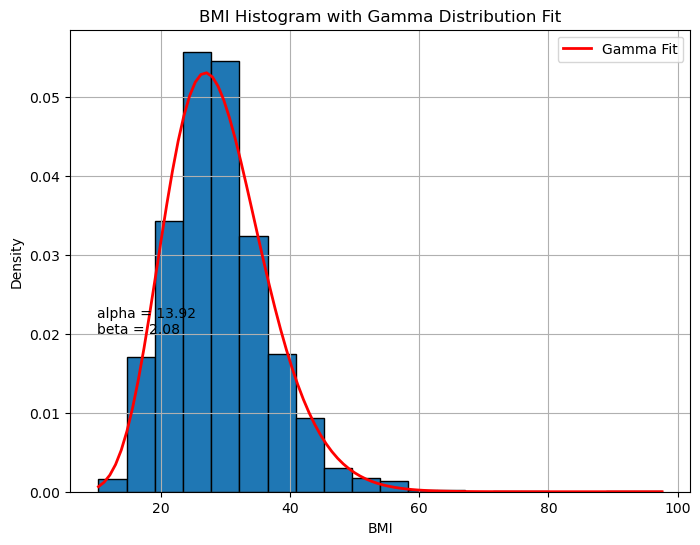

In [9]:
from scipy.stats.distributions import gamma
#extract bmi data
data = df['bmi']
#Get mean and variance
bmi_mean = data.mean()
bmi_var = data.var()
#calculate alpha and beta 
alpha_mom = bmi_mean ** 2 / bmi_var
beta_mom = bmi_var / bmi_mean
#Plot histogram
data.hist(density=True, bins=20, ec='black', figsize=(8,6))
#Overlay Gamma PDF
label = f'alpha = {alpha_mom:.2f}\nbeta = {beta_mom:.2f}'
plt.annotate(label, xy=(10, 0.02))

x = np.linspace(data.min(), data.max(), 100)
pdf = gamma.pdf(x, a=alpha_mom, scale=beta_mom)

plt.plot(x, pdf, 'r',linewidth=2, label='Gamma Fit')

plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Histogram with Gamma Distribution Fit')
plt.legend()
plt.show()


In [10]:
print(f"Population Mean: {bmi_mean:.4f}")
print(f"Population Variance: {bmi_var:.4f}")

Population Mean: 28.9436
Population Variance: 60.1901


### Discussion: 
* The histogram shows a clear right skew, with most BMI values clustered between 19 and 38. The Gamma curve mirrors this skew well.
* The Gamma distribution is well-suited for **positive, continuous, and skewed variables**, which matches the nature of BMI.  
* The central portion of the distribution aligns closely with the fitted curve, suggesting a good model fit for most observations.

## II.3 Point Estimate

### II.3.a Random Sampling:

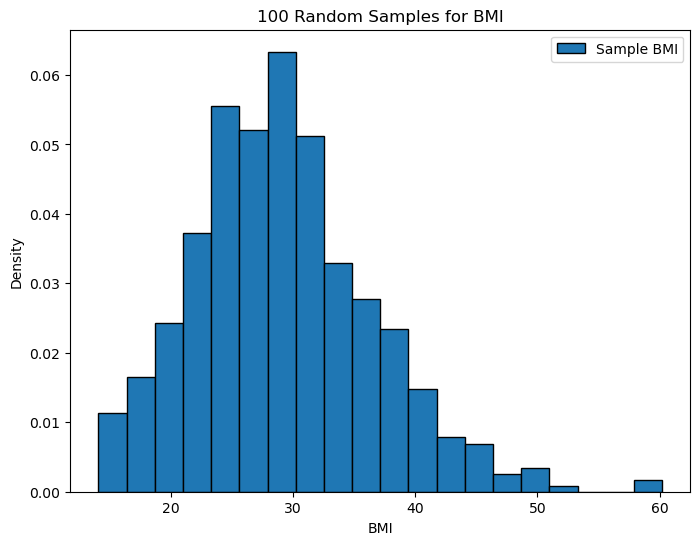

In [11]:
np.random.seed(42)
sample_bmi = pd.Series(np.random.choice(a=df['bmi'], size=500))

plt.figure(figsize=(8,6))
plt.hist(sample_bmi, bins=20, density=True, edgecolor='black', label='Sample BMI')

plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('100 Random Samples for BMI')
plt.legend()
plt.show()

#### Compare the sample mean and variance with the population mean and variance

In [12]:
#Sample mean and variance
sample_mean = sample_bmi.mean()
sample_var = sample_bmi.var()

#Pop mean and variance
pop_mean = df['bmi'].mean()
pop_var = df['bmi'].var()

print(f"Mean difference: {abs(sample_mean - pop_mean):.3f}")
print(f"Variance difference: {abs(sample_var - pop_var):.3f}")

Mean difference: 0.335
Variance difference: 6.227


Our sample mean is very close to the population mean with a difference of 0.335. The sample variance show slimghtly bigger in difference when 
comparing to the population variance, which is likely due to random sampling with a small subset of data.

### II.3.b Discussion:

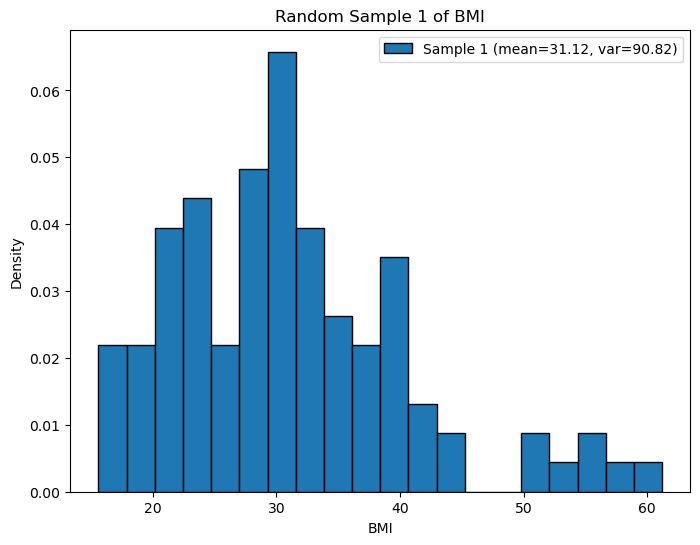

Sample 1 mean: 31.12
Sample 1 variance: 90.82


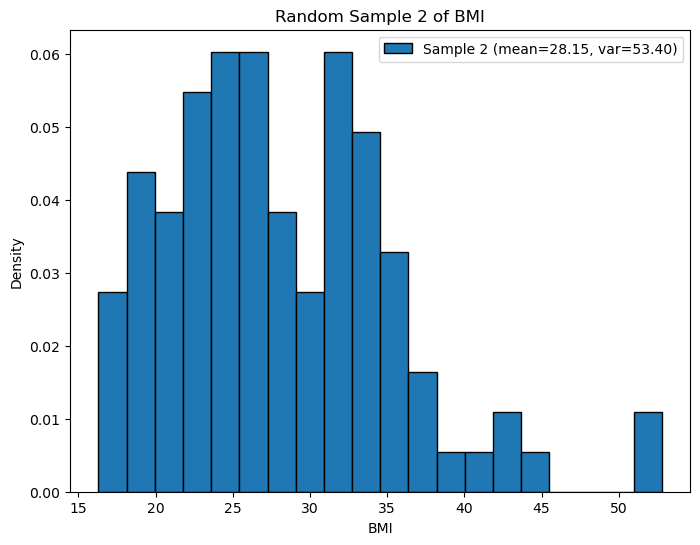

Sample 2 mean: 28.15
Sample 2 variance: 53.40


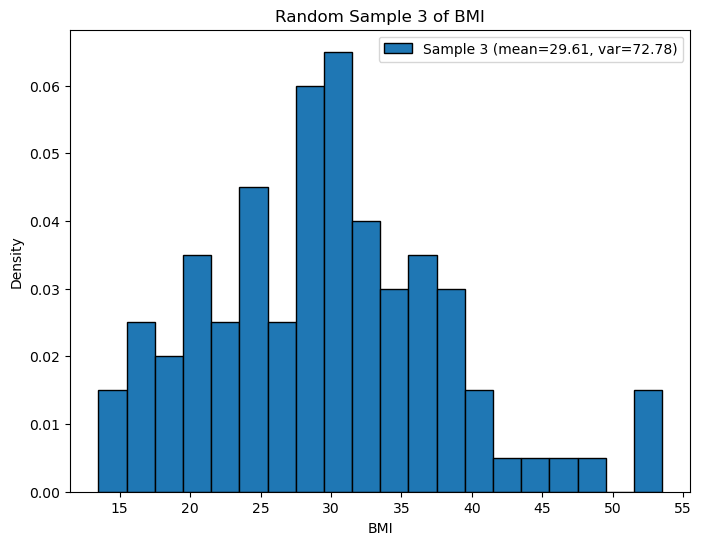

Sample 3 mean: 29.61
Sample 3 variance: 72.78


In [13]:
for i in range(3):
    np.random.seed(i+1)
    sample_bmi = pd.Series(np.random.choice(a=df['bmi'], size=100))

    mean = sample_bmi.mean()
    var = sample_bmi.var()

    #Hist for each sample
    plt.figure(figsize=(8, 6))
    plt.hist(sample_bmi, bins=20, density=True, edgecolor='black', 
             label=f'Sample {i+1} (mean={mean:.2f}, var={var:.2f})')

    plt.xlabel('BMI')
    plt.ylabel('Density')
    plt.title(f'Random Sample {i+1} of BMI')
    plt.legend()
    plt.show()
    print(f"Sample {i+1} mean: {mean:.2f}")
    print(f"Sample {i+1} variance: {var:.2f}")


- The three random samples yield slightly different **means** and **variances**, even though they are drawn from the same population.  
- This variation arises because  each sample may capture different subsets of the population distribution.  
- Despite these differences, all values remain **close to the population’s true mean and variance**, illustrating that random samples approximate population parameters decently.  
- The difference between the **means** and **variances** can be improved by increasing the sample size. This would result in a smaller differences between the sample means/variances and the population mean/variance

## II.4 Correlation Analysis

Correlation Matrix:
                     bmi    age  avg_glucose_level
bmi                1.000  0.334              0.184
age                0.334  1.000              0.238
avg_glucose_level  0.184  0.238              1.000


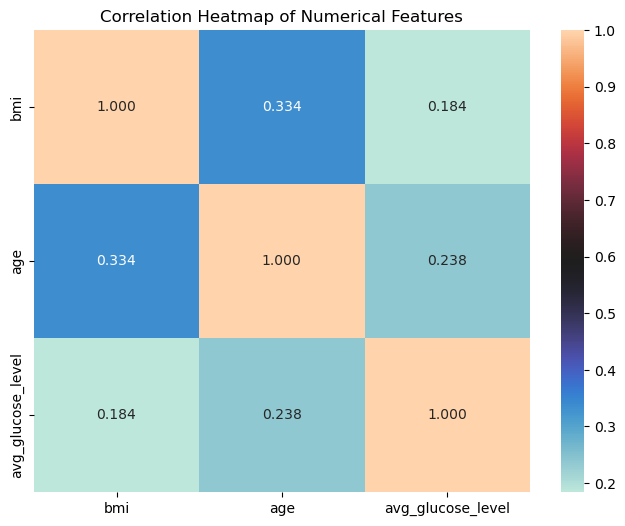

In [14]:
corr_matrix = df[nfeatures].corr().round(3)

#Correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

#Plot the heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="icefire", fmt=".3f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


###  Discussion

- **bmi and age (r = 0.334)**  
  There is a moderate positive correlation, meaning that BMI tends to increase slightly with age.  
  However, this relationship is not very strong.

- **bmi and avg_glucose_level (r = 0.184)**  
  There is a weak positive correlation indicates that higher BMI is slightly associated with higher glucose levels.
 
- **age and avg_glucose_level (r = 0.238)**  
  A weak-to-moderate correlation shows that older individuals tend to have higher glucose levels on average,  
  likely due to metabolic and health factors.

### **Conclusion**

Since all of the numerical show weak to moderate positive relationship with one another, we can see that they are slightly related in a biological way but remain resonably independent. Which means that we can treat them as independent feature for our model and prediction.

## II.5 Hypotheses Question Propose

Based on the numerical features related to stroke prediction, our team propose the following hypotheses:

#### **Hypothesis 1: Average Glucose Level and Stroke Risk**
- **Research Question:** Are higher average glucose levels associated with an increased risk of stroke?  
- **Null Hypothesis (H₀):** There is **no significant** relationship between average glucose level and stroke occurrence.  
- **Alternative Hypothesis (H₁):** Higher average glucose levels can lead to **higher chance** of having a stroke.  
- **Variables:**  
  - Independent Variable: `avg_glucose_level`  
  - Dependent Variable: `stroke`

#### **Hypothesis 2: BMI and Stroke Risk**
- **Research Question:** Is BMI a significant predictor of stroke occurrence?  
- **Null Hypothesis (H₀):** BMI has **no significant** effect on the chance of having a stroke.  
- **Alternative Hypothesis (H₁):** Higher BMI might associate with **higher chance** of stroke.  
- **Variables:**  
  - Independent Variable: `bmi`  
  - Dependent Variable: `stroke`

#### **Hypothesis 3: Age and Stroke Risk**
- **Research Question:** Does older age increase the likelihood of stroke?  
- **Null Hypothesis (H₀):** There is **no significant** relationship between age and stroke occurrence.  
- **Alternative Hypothesis (H₁):** Older individuals have a **higher chance** of experiencing a stroke.  
- **Variables:**  
  - Independent Variable: `age`  
  - Dependent Variable: `stroke`  